*For this Data Science Project the goal is to determine whether passengers survived the Titanic sinking disaster using 3 different Machine Learning Models which are Logistic Regression, K - Nearest Neighbour and the Stochastic Gradient Descent Classifier and determining which of the 3 models best accurately predicts the survival of passengers on the Titanic ship*

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

*This first section will show the data exploration of the Titanic Dataset.*

In [6]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

titanic = pd.read_csv(url)

titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.set_index('PassengerId').head(8)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [10]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [11]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


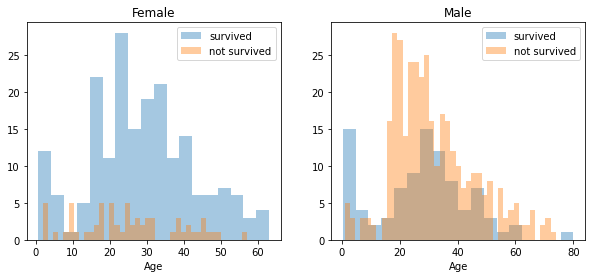

In [12]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

*The graph above is showing the distribution of survival by age group of both the Male and Female genders.*

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

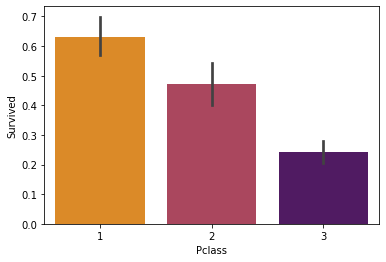

In [13]:
sns.barplot(x='Pclass', y='Survived', data=titanic, palette = 'inferno_r')

*The graph above shows the distribution of survivors by the class they were travelling on board the Titanic.*

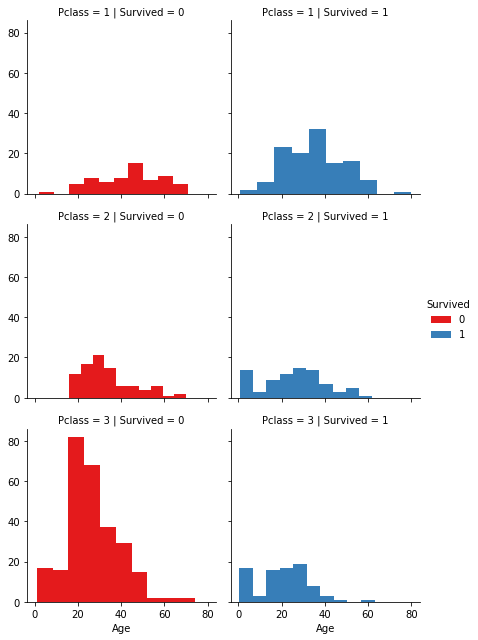

In [14]:
grid = sns.FacetGrid(titanic, row='Pclass', col='Survived', hue='Survived', palette='Set1')
grid.map(plt.hist, 'Age')
grid.add_legend();

*The graph above shows the distribution of Survivors and Non Survivors by their class and age whilst on board the Titanic.*

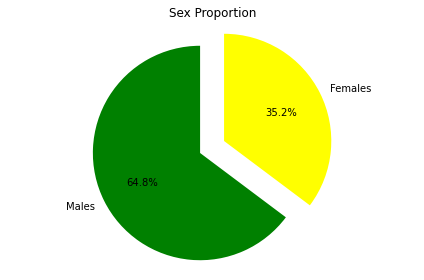

In [347]:

males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()
proportions = [males, females]
plt.pie(
    proportions,
    labels = ['Males', 'Females'],
    shadow = False,
    colors = ['green','yellow'],
    explode = (0.15 , 0.1),
    startangle = 90,
    autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Sex Proportion")
plt.tight_layout()
plt.show()




*The piechart above shows the proportion of Males to Females on board the Titanic.*

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


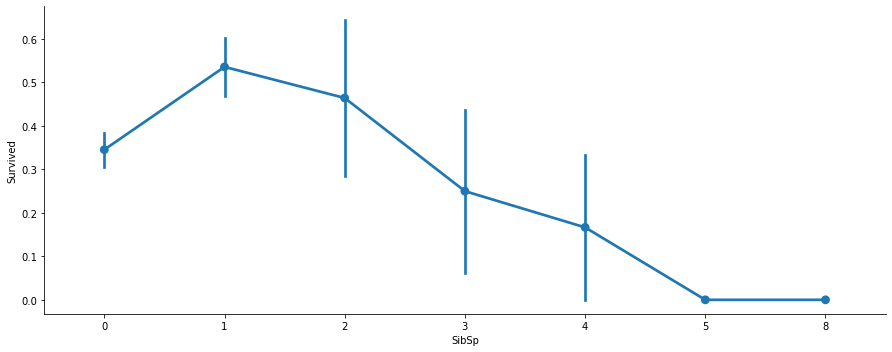

In [348]:


axes = sns.factorplot('SibSp','Survived', 
                      data=titanic, aspect = 2.5, )

*This graph shows the number of siblings each survivng passenger had on the Titanic. You can see that the majority of surviving passengers had at least 1 sibling.* 

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


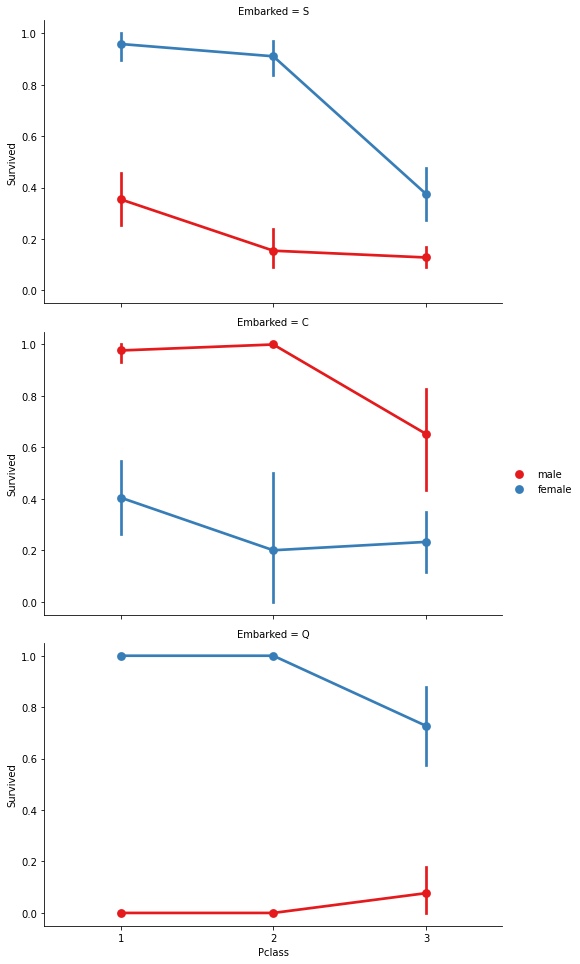

In [15]:
FacetGrid = sns.FacetGrid(titanic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='Set1',  order=None, hue_order=None )
FacetGrid.add_legend()

*The graphs above shows the number of survivors by their travel class on board the Titanic from each of the three locations of embarkment which are Southampton, Cherbourg, and Queenstown.* 

*This next section below shows data preparation before the Machine Learning models are applied to the data*

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
print('Number of passengers in train dataset: ' + str(len(train)))

Number of passengers in train dataset: 891


<AxesSubplot:xlabel='Survived', ylabel='count'>

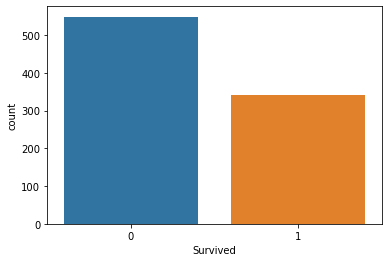

In [6]:
sns.countplot(x = 'Survived', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

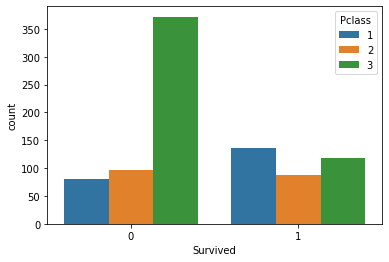

In [10]:
sns.countplot(x = 'Survived' , hue = 'Pclass', data = train)

<AxesSubplot:ylabel='Frequency'>

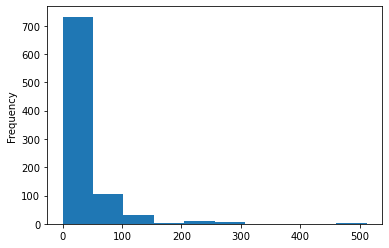

In [11]:
train['Fare'].plot.hist()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

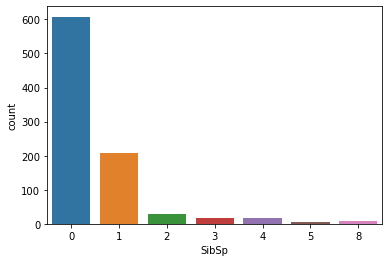

In [13]:
sns.countplot(x = 'SibSp' , data = train)

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

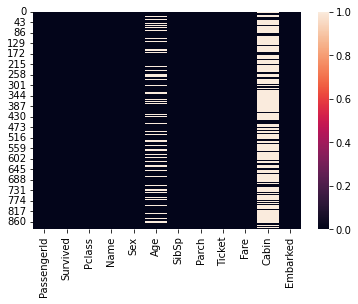

In [15]:
sns.heatmap(train.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

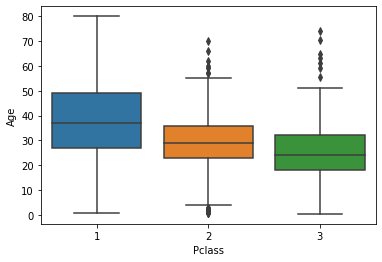

In [16]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [22]:
sex= pd.get_dummies(train['Sex'], drop_first = True)

embark = pd.get_dummies(train['Embarked'],drop_first=True)

pcl = pd.get_dummies(train['Pclass'],drop_first=True)

In [23]:
train = pd.concat([train,sex,embark,pcl],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,1


In [25]:
train = pd.concat([train,sex,embark,pcl],axis=1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,male,Q,S,2,3,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,1,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,1,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,1,1,0,1,0,1


In [26]:
train.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1


In [27]:
train.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
male          0
Q             0
S             0
2             0
3             0
male          0
Q             0
S             0
2             0
3             0
male          0
Q             0
S             0
2             0
3             0
dtype: int64

In [28]:
train_values = {'Age': round(np.mean(train['Age']))}
train = train.fillna(value = train_values)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1


In [29]:
sex = pd.get_dummies(test['Sex'], drop_first = True)

embark = pd.get_dummies(test['Embarked'], drop_first = True)

pcl = pd.get_dummies(test['Pclass'], drop_first = True)

In [30]:
test = pd.concat([test,sex,embark,pcl],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1


In [31]:
test.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)

In [32]:
test.isnull().sum()

Age      86
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
2         0
3         0
dtype: int64

In [33]:
test_values = {'Age':round(np.mean(test['Age'])), 'Fare':round(np.mean(test['Fare']))}

test= test.fillna(value = test_values)

test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [298]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [299]:
X = train.drop('Survived', axis=1)

y= train['Survived']

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [301]:
X_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3,male,Q,S,2,3
114,17.0,0,0,14.4583,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
874,28.0,1,0,24.0000,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
76,30.0,0,0,7.8958,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1
876,20.0,0,0,9.8458,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1
674,30.0,0,0,0.0000,1,0,1,1,0,1,0,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,19.0,0,0,7.6500,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1
767,30.5,0,0,7.7500,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1
72,21.0,0,0,73.5000,1,0,1,1,0,1,0,1,1,0,1,0,1,1,0
235,30.0,0,0,7.5500,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1


In [302]:
X_test

,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3,male,Q,S,2,3
862,48.0,0,0,25.9292,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
223,30.0,0,0,7.8958,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1
84,17.0,0,0,10.5000,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0
680,30.0,0,0,8.1375,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1
535,7.0,0,2,26.2500,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,24.0,0,2,14.5000,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0
551,27.0,0,0,26.0000,1,0,1,1,0,1,0,1,1,0,1,0,1,1,0
239,33.0,0,0,12.2750,1,0,1,1,0,1,0,1,1,0,1,0,1,1,0
484,25.0,1,0,91.0792,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [317]:
y_train

6      0
718    0
685    0
73     0
882    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 596, dtype: int64

In [318]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: Survived, Length: 295, dtype: int64

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


*This next section below shows the model selection process and the application of each model to the Titanic test set*.

In [307]:
from sklearn.linear_model import LogisticRegression

In [308]:
lr=LogisticRegression()


In [309]:
lr.fit(X_train,y_train)

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [310]:
predict=lr.predict(X_test)

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Confusion Matrix:
[[152  23]
 [ 36  84]]


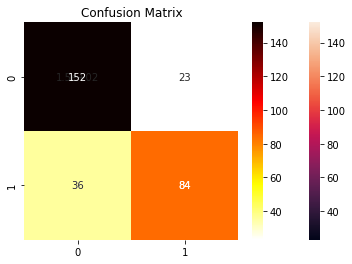

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       175
           1       0.79      0.70      0.74       120

    accuracy                           0.80       295
   macro avg       0.80      0.78      0.79       295
weighted avg       0.80      0.80      0.80       295

Accuracy: 0.8


In [311]:
from sklearn.metrics import classification_report, accuracy_score
result = confusion_matrix(y_test,predict)
print("Confusion Matrix:")
print(result)
import seaborn as sns
sns.heatmap(result, annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
sns.heatmap(result,annot=True,cmap='hot_r', fmt='d')
plt.show()
print("========================================")
result1 = classification_report(y_test,predict)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,predict)
print("========================================")
print("Accuracy:",result2)

*The heatmap shows that 59 passengers were misclassified in the dataset by the Logistic Regression Model. This caused the accuracy to be only 80%.*

In [312]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc=[]

for i in range (1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    Titan = knn.predict(X_test)
    acc.append(accuracy_score(y_test,Titan))
    print("For k = ",i," : ",accuracy_score (y_test,Titan))

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

For k =  1  :  0.6915254237288135
For k =  2  :  0.688135593220339
For k =  3  :  0.7254237288135593
For k =  4  :  0.7050847457627119
For k =  5  :  0.7084745762711865
For k =  6  :  0.6949152542372882
For k =  7  :  0.7220338983050848
For k =  8  :  0.7016949152542373
For k =  9  :  0.711864406779661
For k =  10  :  0.7016949152542373
For k =  11  :  0.7220338983050848
For k =  12  :  0.7084745762711865
For k =  13  :  0.7016949152542373
For k =  14  :  0.711864406779661
For k =  15  :  0.7220338983050848
For k =  16  :  0.7288135593220338
For k =  17  :  0.7322033898305085
For k =  18  :  0.7220338983050848
For k =  19  :  0.7220338983050848


/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

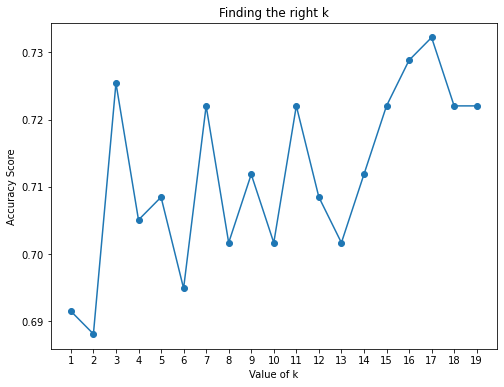

In [313]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20), acc, marker = "o")
plt.xlabel ("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Confusion Matrix:
[[156  19]
 [ 48  72]]


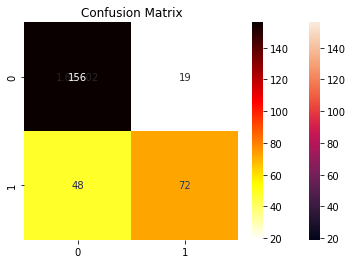

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       175
           1       0.79      0.60      0.68       120

    accuracy                           0.77       295
   macro avg       0.78      0.75      0.75       295
weighted avg       0.78      0.77      0.77       295

Accuracy: 0.7728813559322034


In [314]:
from sklearn.metrics import classification_report, accuracy_score

KNN = KNeighborsClassifier(n_neighbors = 17)
KNN.fit(X,y)
predict = KNN.predict(X_test)
result = confusion_matrix(y_test,predict)
print("Confusion Matrix:")
print(result)
import seaborn as sns
sns.heatmap(result, annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
sns.heatmap(result,annot=True,cmap='hot_r', fmt='d')
plt.show()
print("========================================")
result1 = classification_report(y_test,predict)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,predict)
print("========================================")
print("Accuracy:",result2)

*The heatmap shows that 67 passengers were misclassified in the dataset by the K- Nearest Neigbor Model. This caused the accuracy to be only 77.3%*.

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7322033898305085
Confusion Matrix:
[[133  42]
 [ 37  83]]


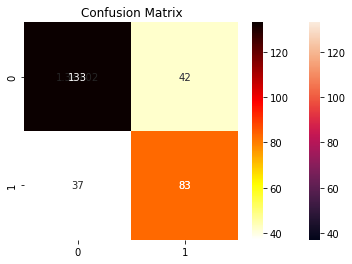

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       175
           1       0.66      0.69      0.68       120

    accuracy                           0.73       295
   macro avg       0.72      0.73      0.72       295
weighted avg       0.73      0.73      0.73       295

Accuracy: 0.7322033898305085


In [315]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(loss="squared_loss", penalty="l2", max_iter=4500,tol=-1000, random_state=1)
clf_SGD.fit(X_train,y_train)
predict = clf_SGD.predict(X_test)
print(accuracy_score(y_test,predict))
result = confusion_matrix(y_test,predict)
print("Confusion Matrix:")
print(result)
import seaborn as sns
sns.heatmap(result, annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
sns.heatmap(result,annot=True,cmap='hot_r', fmt='d')
plt.show()
print("========================================")
result1 = classification_report(y_test,predict)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,predict)
print("========================================")
print("Accuracy:",result2)

*The heatmap shows that 79 passengers were misclassified in the dataset by the Stochastic Gradient Descent Classifier. This caused the accuracy to be only 73.2%.*

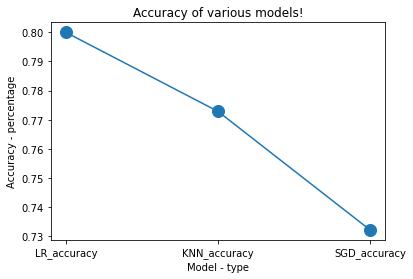

<Figure size 5760x5760 with 0 Axes>

In [316]:
LR_accuracy = 0.8

KNN_accuracy = 0.7728813559322034

SGD_accuracy = 0.7322033898305085


import matplotlib.pyplot as plt
x = ['LR_accuracy','KNN_accuracy','SGD_accuracy']
y = [0.8, 0.7728813559322034,0.7322033898305085]
plt.xlabel('Model - type')
plt.ylabel('Accuracy - percentage')
plt.title('Accuracy of various models!')
plt.plot(x, y,
         marker='o',markersize=12)
plt.figure(figsize=(80,80))
plt.show()




*The graph above shows that Logistic Regression overall is a better model at predicting the accuracy of the Survivors of the Titanic Disaster as the least number of passengers were misclassified by this model hence this model had the highest accuracy of 80%. The second best performing model was the K Nearest Neighbor model with an accuracy of 77.3%. The Stochastic Gradient Descent Classifier was the worst performing model having misclassified the most number of passengers on board the Titanic and having the lowest accuracy of 73.2%. With that being said a better accuracy percentage can be achieved with the application of more complex data processing strategies, feature engineering and model tuning.This concludes my Data Science Project on the Titanic Dataset.*